# Test Dataset Solo Traveler

Given data does not have labels and to evaluate our model we have created a test dataset using the below approach. This notebook file contains code for generation of test dataset for solo travelers which is basically identifying the taxi drivers.

As an initiall attempt, from google maps, we have first picked a random latitude and logitude pair from the location in Rio which is passanger pickup and drop off point as shown in below image.

### Figure:1 - Image of Rio Airport passanger pickup-dropoff spot

![title](rio_airport.png)

From the image above, it can be noticed that the two red boxes highlighted indicate the entry and exit points of the passanger pickup. These when indicated by latitude and logitude points, indicate the (maximum_latitude,minimun_longitude) on the left top all the way to (minimum_latitude,maximum_longitude) on the right bottom.

In [1]:
import json  
import pandas as pd  
import time

In [3]:
 

with open('data\matching.json') as f: 
    df = pd.DataFrame(json.load(f))

In [4]:
df2 = df.copy()
len(df2),len(df)

(1767244, 1767244)

In [5]:
df1=pd.DataFrame(df.head())
df1

Building    Level      ClientMacAddr        lat        lng  \
0     TPS2  Level 3  88:e9:fe:ec:8d:95 -22.814076 -43.247676   
1     TPS2  Level 3  88:e9:fe:ec:8d:95 -22.814076 -43.247676   
2     TPS2  Level 3  b8:27:eb:14:a4:88 -22.813697 -43.247597   
3     TPS2  Level 3  b8:27:eb:14:a4:88 -22.813697 -43.247597   
4     TPS2  Level 3  28:83:35:26:bc:f3 -22.813551 -43.247198   

                     localtime  
0   2019-11-19 00:00:00.12 UTC  
1   2019-11-19 00:00:00.12 UTC  
2  2019-11-19 00:00:00.197 UTC  
3  2019-11-19 00:00:00.197 UTC  
4  2019-11-19 00:00:00.272 UTC

Loaded data to df and dropped all duplicate entries. It was identified during our data visualization and analysis phase that the data has several duplicate entries.


In [6]:

df =df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df)

1034663

In [7]:
df['localtime'] = pd.to_datetime(df['localtime'], utc=True)


In [8]:
df1.dtypes

Building          object
Level             object
ClientMacAddr     object
lat              float64
lng              float64
localtime         object
dtype: object

In [9]:
df.reset_index(drop=True, inplace=True)
df.sort_values(by=['localtime'], ascending=False,inplace = True)
len(df)

1034663

Here is a brief analysis on how exactly the data is spread

In [8]:
df1

Building    Level      ClientMacAddr        lat        lng  \
0     TPS2  Level 3  88:e9:fe:ec:8d:95 -22.814076 -43.247676   
1     TPS2  Level 3  88:e9:fe:ec:8d:95 -22.814076 -43.247676   
2     TPS2  Level 3  b8:27:eb:14:a4:88 -22.813697 -43.247597   
3     TPS2  Level 3  b8:27:eb:14:a4:88 -22.813697 -43.247597   
4     TPS2  Level 3  28:83:35:26:bc:f3 -22.813551 -43.247198   

                     localtime  
0   2019-11-19 00:00:00.12 UTC  
1   2019-11-19 00:00:00.12 UTC  
2  2019-11-19 00:00:00.197 UTC  
3  2019-11-19 00:00:00.197 UTC  
4  2019-11-19 00:00:00.272 UTC

In [9]:
macid = df1.groupby('ClientMacAddr')

In [10]:
macid.groups

{'28:83:35:26:bc:f3': Int64Index([4], dtype='int64'),
 '88:e9:fe:ec:8d:95': Int64Index([0, 1], dtype='int64'),
 'b8:27:eb:14:a4:88': Int64Index([2, 3], dtype='int64')}

In [11]:
df1.sort_values(by=['ClientMacAddr'])

Building    Level      ClientMacAddr        lat        lng  \
4     TPS2  Level 3  28:83:35:26:bc:f3 -22.813551 -43.247198   
0     TPS2  Level 3  88:e9:fe:ec:8d:95 -22.814076 -43.247676   
1     TPS2  Level 3  88:e9:fe:ec:8d:95 -22.814076 -43.247676   
2     TPS2  Level 3  b8:27:eb:14:a4:88 -22.813697 -43.247597   
3     TPS2  Level 3  b8:27:eb:14:a4:88 -22.813697 -43.247597   

                     localtime  
4  2019-11-19 00:00:00.272 UTC  
0   2019-11-19 00:00:00.12 UTC  
1   2019-11-19 00:00:00.12 UTC  
2  2019-11-19 00:00:00.197 UTC  
3  2019-11-19 00:00:00.197 UTC

In [12]:
pd.DataFrame(df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False) 

0
ClientMacAddr          
38:01:95:38:cf:bc  7265
c0:a5:dd:17:fb:06  7104
38:01:95:36:c0:aa  7049
94:10:3e:0c:c2:f3  6458
38:01:95:37:74:e0  6448
...                 ...
0c:cb:85:fd:6e:d0     1
8c:f1:12:00:48:39     1
8c:f1:12:01:0d:74     1
8c:f1:12:01:40:7a     1
9a:c8:c6:10:c0:83     1

[90935 rows x 1 columns]

### 38:01:95:38:cf:bc	7265

In [13]:
df[df['ClientMacAddr'] == '38:01:95:37:74:e0']['localtime'].max() - df[df['ClientMacAddr'] == '38:01:95:37:74:e0']['localtime'].min()

Timedelta('0 days 23:58:47.933000')

### c0:a5:dd:17:fb:06	7104

In [14]:
df[df['ClientMacAddr'] == 'c0:a5:dd:17:fb:06']['localtime'].max() - df[df['ClientMacAddr'] == 'c0:a5:dd:17:fb:06']['localtime'].min()

Timedelta('0 days 23:59:49.928000')

### 38:01:95:36:c0:aa	7049

In [15]:
df[df['ClientMacAddr'] == '38:01:95:36:c0:aa']['localtime'].max() - df[df['ClientMacAddr'] == '38:01:95:36:c0:aa']['localtime'].min()

Timedelta('0 days 23:59:44.029000')

In [16]:
count_mac = pd.DataFrame(df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False) 

In [17]:
count_mac

0
ClientMacAddr          
38:01:95:38:cf:bc  7265
c0:a5:dd:17:fb:06  7104
38:01:95:36:c0:aa  7049
94:10:3e:0c:c2:f3  6458
38:01:95:37:74:e0  6448
...                 ...
0c:cb:85:fd:6e:d0     1
8c:f1:12:00:48:39     1
8c:f1:12:01:0d:74     1
8c:f1:12:01:40:7a     1
9a:c8:c6:10:c0:83     1

[90935 rows x 1 columns]

In [18]:
df1 = count_mac[count_mac[0].between(40, 41)]

In [19]:
df1

0
ClientMacAddr        
58:d9:c3:79:b8:90  41
40:b0:76:1e:5c:d6  41
24:46:c8:df:cb:e3  41
24:46:c8:e0:31:5f  41
30:07:4d:6e:fb:1b  41
...                ..
08:c5:e1:30:b2:2b  40
88:b4:a6:65:a6:0a  40
b4:bf:f6:95:8d:4b  40
48:49:c7:2e:43:e2  40
d0:81:7a:64:5a:71  40

[216 rows x 1 columns]

### 2a:17:40:73:70:95	10

In [20]:
df[df['ClientMacAddr'] == '2a:17:40:73:70:95']['localtime'].max() - df[df['ClientMacAddr'] == '2a:17:40:73:70:95']['localtime'].min()

Timedelta('0 days 00:03:58.068000')

### 74:e1:b6:f0:58:75	14

In [21]:
df[df['ClientMacAddr'] == '74:e1:b6:f0:58:75']['localtime'].max() - df[df['ClientMacAddr'] == '74:e1:b6:f0:58:75']['localtime'].min()

Timedelta('0 days 00:07:26.621000')

### a8:96:75:1b:b4:59	40

In [22]:
df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['localtime'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['localtime'].min()

Timedelta('0 days 00:18:37.982000')

In [23]:
df1 = count_mac[count_mac[0].between(25,26)]
df1

0
ClientMacAddr        
00:b5:d0:d1:b2:9b  26
54:fc:f0:31:6e:08  26
fc:a6:21:14:32:a7  26
e8:93:09:60:6c:54  26
ac:0d:1b:c9:60:ab  26
...                ..
38:9a:f6:ee:d2:ed  25
70:bb:e9:dc:b0:2d  25
10:98:c3:c9:fe:bf  25
5c:f7:e6:b8:2c:d9  25
60:30:d4:31:8a:b6  25

[308 rows x 1 columns]

### occured 40 times. difference in their locations 

In [24]:
(df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].min(),df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lng'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lng'].min())

(0.0018894096384336478, 0.0019952372924549877)

In [25]:
x = [df[df['ClientMacAddr'] == '98:39:8e:ad:6d:cb']['lat']]

In [26]:
y=[df[df['ClientMacAddr'] == '98:39:8e:ad:6d:cb']['lng']]

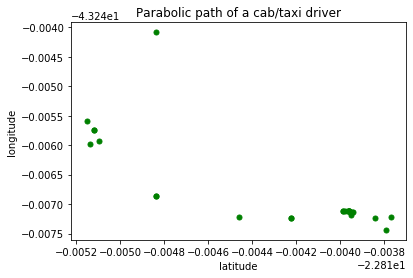

In [32]:
import matplotlib.pyplot as plt

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.title('Parabolic path of a cab/taxi driver')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

Above graph shows a plot of latitude,longitude points marked on the graph of a macID. Several points followed this latitude,longitude parabolic path.  This indicates that the MacIDs that follow these latitude,logitudes should have travelled along the same route as indicated in Figure-1. Below is the analysis of few more such points.


In [29]:
df1 = count_mac[count_mac[0].between(55,56)]
df1

0
ClientMacAddr        
14:58:d0:72:e7:91  56
5c:c9:d3:88:c9:db  56
0c:cb:85:bb:52:f3  56
d8:9c:67:fe:64:cb  56
7c:8b:b5:2e:f3:43  56
...                ..
e4:2b:34:23:65:50  55
80:58:f8:a4:e2:05  55
44:91:60:85:62:59  55
7c:8b:b5:97:41:cd  55
c0:b6:58:07:89:79  55

[147 rows x 1 columns]

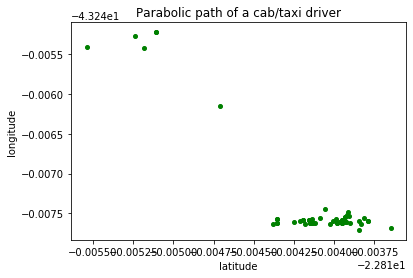

In [33]:
macid = '44:91:60:85:62:59'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=4)
plt.title('Parabolic path of a cab/taxi driver')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [29]:
df1 = count_mac[count_mac[0].between(99,100)]
df1

0
ClientMacAddr         
a4:b8:05:c5:46:73  100
48:49:c7:df:23:84  100
fc:64:3a:74:57:d8  100
44:91:60:64:d8:9d  100
60:1d:91:04:d6:f7  100
44:91:60:ce:d7:45  100
88:79:7e:6b:83:3b  100
0c:cb:85:93:8b:cf  100
04:d4:c4:9c:41:7d  100
38:9a:f6:96:29:ab  100
50:92:b9:dc:a4:22  100
68:7d:6b:11:91:7b  100
7c:8b:b5:39:6b:bd  100
28:83:35:73:0a:65  100
7c:8b:b5:30:42:f5  100
a8:96:75:43:51:3b  100
68:c4:4d:61:ad:4d  100
f4:f5:24:8e:42:28  100
74:b5:87:83:a1:19  100
2c:33:61:96:9e:c6  100
88:b4:a6:a3:6b:1f  100
18:89:5b:44:e8:f1  100
38:80:df:ae:2f:3e  100
d8:1c:79:5b:de:e5  100
a8:16:d0:bc:00:25  100
24:c6:96:99:76:a7  100
a8:16:d0:1c:f0:3d   99
48:e2:44:78:d2:15   99
04:d6:aa:d0:07:33   99
a8:16:d0:39:ea:05   99
fc:64:3a:db:59:9e   99
f0:99:b6:3c:62:7b   99
dc:0b:34:d5:38:be   99
fc:64:3a:63:73:cc   99
58:d9:c3:76:c7:24   99
74:d2:1d:d7:bf:2f   99
f8:e9:4e:dd:73:44   99
10:98:c3:2b:4a:c3   99
c0:e8:62:0e:43:9b   99
30:4b:07:1f:3f:6c   99
d4:63:c6:a5:ec:3b   99
bc:4c:c4:b6:57:bd   99
bc:6c:21:be:1f:48   99
34:29:12:28:56:80   99
b4:c4:fc:5e:39:34   99

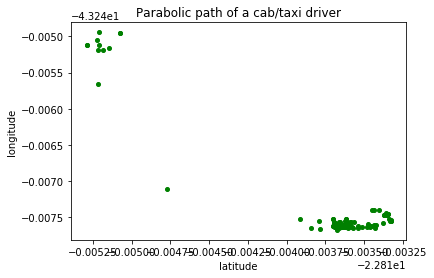

In [34]:
macid = 'd4:63:c6:a5:ec:3b'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=4)
plt.title('Parabolic path of a cab/taxi driver')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

The distribution of the above points is thicker at the start and end than in the middle possibly due to the some contention/traffic/ even may be due to longer wait of the vehicle/person at these points at these places and probably a faster moment at the rest of the region, not giving enough time for the routers to capture information about these travelers.

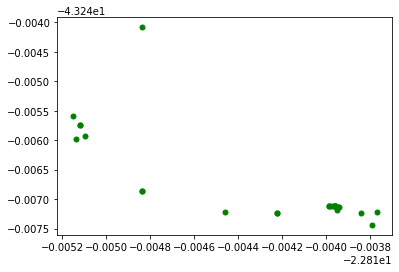

In [31]:
macid = 'ac:0d:1b:c9:60:ab'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.show()

Below are certain other points that did not really follow the pattern as shown above, points that did not belong to these latitude and longitude ranges.

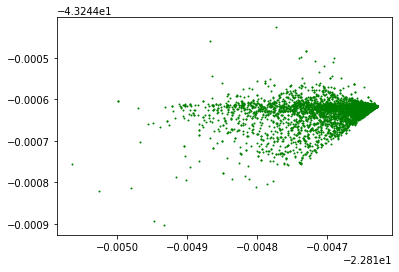

In [35]:
macid = '38:01:95:37:74:e0'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
plt.show()

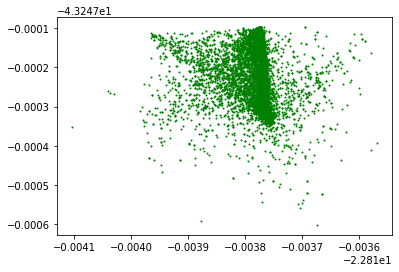

In [36]:
macid = '38:01:95:38:cf:bc'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
plt.show()

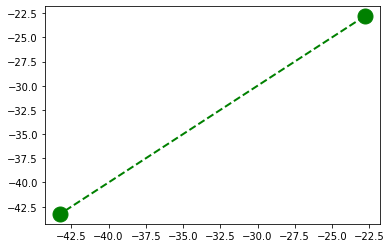

In [37]:
plt.plot((df['lat'].min(),df['lng'].min()),(df['lat'].min(), df['lng'].min()), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=15)
plt.show()

https://www.datacamp.com/community/tutorials/geospatial-data-python
---------------------------

https://science.sciencemag.org/content/327/5968/1018/tab-article-info
Article Information
vol. 327 no. 5968 1018-1021

DOI: 
https://doi.org/10.1126/science.1177170
PubMed: 
20167789
Published By: 
American Association for the Advancement of Science
Print ISSN: 
0036-8075
Online ISSN: 
1095-9203
History: 
Received for publication June 2, 2009
Accepted for publication December 28, 2009
.
Copyright & Usage: 
Copyright © 2010, American Association for the Advancement of Science


https://github.com/pysal/notebooksv

## https://gis.stackexchange.com/questions/5857/clustering-trajectories-gps-data-of-x-y-points-and-mining-the-data
Please cite the following papers when using this GPS dataset. [1] Yu Zheng, Lizhu Zhang, Xing Xie, Wei-Ying Ma. Mining interesting locations and travel sequences from GPS trajectories. In Proceedings of International conference on World Wild Web (WWW 2009), Madrid Spain. ACM Press: 791-800. [2] Yu Zheng, Quannan Li, Yukun Chen, Xing Xie, Wei-Ying Ma. Understanding Mobility Based on GPS Data. In Proceedings of ACM conference on Ubiquitous Computing (UbiComp 2008), Seoul, Korea. ACM Press: 312-321. [3] Yu Zheng, Xing Xie, Wei-Ying Ma, GeoLife: A Collaborative Social Networking Service among User, location and trajectory. Invited paper, in IEEE Data Engineering Bulletin. 33, 2, 2010, pp. 32-40.

# Most useful in terms of our project and for the documentation
https://www.researchgate.net/publication/334030853_MovingPandas_Efficient_Structures_for_Movement_Data_in_Python

https://github.com/gboeing/urban-data-science/blob/master/15-Spatial-Cluster-Analysis/cluster-analysis.ipynb

In [38]:
len(df)

1034663

In [39]:
Filtered_df1 = df.copy()

In [40]:
(df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].min(),df[df['ClientMacAddr'] == '38:01:95:38:cf:bc']['lng'].max() - df[df['ClientMacAddr'] == '38:01:95:38:cf:bc']['lng'].min())

(0.0018894096384336478, 0.0005054223289420179)

In [41]:
from datetime import timedelta
df['localtime'].mean()+ timedelta(hours=3)

Timestamp('2019-11-19 14:50:11.544763392+0000', tz='UTC')

In [42]:
len(df)

1034663

In [43]:
count_lat = pd.DataFrame(df.groupby(['lat']).size()).sort_values(by=[0], ascending=False)
len(count_lat)

883056

In [44]:
count_lng = pd.DataFrame(df.groupby(['lng']).size()).sort_values(by=[0], ascending=False)
len(count_lng)

883056

In [45]:
count_lat.iloc[1]

0    15
Name: -22.814785462143455, dtype: int64

In [46]:
count_lng.iloc[1]

0    15
Name: -43.244201638326054, dtype: int64

In [47]:
df.loc[(df['lat'] == -22.813965766508655)&(df['lng'] == -43.247112045319234) ]
max_lat_lng = df.loc[(df['lat'] == -22.813965766508655)&(df['lng'] == -43.247112045319234) ]
pd.DataFrame(max_lat_lng.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

0
ClientMacAddr       
04:79:70:60:f1:31  3
84:10:0d:b5:06:e0  2
c0:8c:71:31:bd:d3  2
fc:64:3a:d5:87:d0  2
24:46:c8:dc:b7:9c  1
88:40:3b:50:07:8b  1
f4:f5:24:c5:72:c6  1
f4:f5:24:8a:58:f7  1
f0:d7:aa:d8:75:10  1
d0:77:14:18:c9:ac  1
0c:9d:92:7d:3e:8c  1
bc:98:df:da:85:86  1
a8:db:03:98:96:9c  1
98:39:8e:21:d8:5f  1
18:31:bf:10:64:41  1
28:83:35:d2:03:bb  1
70:fd:46:e1:83:a2  1
08:c5:e1:10:cb:5f  1
68:a3:c4:80:ea:34  1
58:d9:c3:17:d5:6d  1
50:92:b9:e7:22:c2  1
48:49:c7:96:c9:24  1
38:9a:f6:cd:8d:ed  1
30:89:d3:9e:03:b0  1
68:c4:4d:30:bc:58  1

In [49]:
df.loc[(df['lng'] == -43.247112045319234)]

Building    Level      ClientMacAddr        lat        lng  \
310605      TPS2  Level 3  c0:8c:71:31:bd:d3 -22.813966 -43.247112   
310606      TPS2  Level 3  c0:8c:71:31:bd:d3 -22.813966 -43.247112   
389237      TPS2  Level 3  28:83:35:d2:03:bb -22.813966 -43.247112   
393955      TPS2  Level 3  58:d9:c3:17:d5:6d -22.813966 -43.247112   
456308      TPS2  Level 3  84:10:0d:b5:06:e0 -22.813966 -43.247112   
456309      TPS2  Level 3  84:10:0d:b5:06:e0 -22.813966 -43.247112   
703443      TPS2  Level 3  a8:db:03:98:96:9c -22.813966 -43.247112   
721915      TPS2  Level 3  f4:f5:24:8a:58:f7 -22.813966 -43.247112   
770572      TPS2  Level 3  50:92:b9:e7:22:c2 -22.813966 -43.247112   
783562      TPS2  Level 3  f0:d7:aa:d8:75:10 -22.813966 -43.247112   
987041      TPS2  Level 3  30:89:d3:9e:03:b0 -22.813966 -43.247112   
1161140     TPS2  Level 3  70:fd:46:e1:83:a2 -22.813966 -43.247112   
1217700     TPS2  Level 3  38:9a:f6:cd:8d:ed -22.813966 -43.247112   
1247882     TPS2  Level 3  04:79:70:60:f1:31 -22.813966 -43.247112   
1249312     TPS2  Level 3  04:79:70:60:f1:31 -22.813966 -43.247112   
1250686     TPS2  Level 3  04:79:70:60:f1:31 -22.813966 -43.247112   
1273882     TPS2  Level 3  0c:9d:92:7d:3e:8c -22.813966 -43.247112   
1275068     TPS2  Level 3  68:c4:4d:30:bc:58 -22.813966 -43.247112   
1277920     TPS2  Level 3  24:46:c8:dc:b7:9c -22.813966 -43.247112   
1303302     TPS2  Level 3  08:c5:e1:10:cb:5f -22.813966 -43.247112   
1310830     TPS2  Level 3  d0:77:14:18:c9:ac -22.813966 -43.247112   
1383504     TPS2  Level 3  48:49:c7:96:c9:24 -22.813966 -43.247112   
1484661     TPS2  Level 3  98:39:8e:21:d8:5f -22.813966 -43.247112   
1505886     TPS2  Level 3  68:a3:c4:80:ea:34 -22.813966 -43.247112   
1657372     TPS2  Level 3  88:40:3b:50:07:8b -22.813966 -43.247112   
1677015     TPS2  Level 3  bc:98:df:da:85:86 -22.813966 -43.247112   
1697282     TPS2  Level 3  f4:f5:24:c5:72:c6 -22.813966 -43.247112   
1716282     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.813966 -43.247112   
1716530     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.813966 -43.247112   
1761838     TPS2  Level 3  18:31:bf:10:64:41 -22.813966 -43.247112   

                               localtime  
310605  2019-11-19 05:02:12.302000+00:00  
310606  2019-11-19 05:02:12.303000+00:00  
389237  2019-11-19 06:02:25.088000+00:00  
393955  2019-11-19 06:05:39.167000+00:00  
456308  2019-11-19 06:51:59.350000+00:00  
456309  2019-11-19 06:51:59.351000+00:00  
703443  2019-11-19 09:31:17.143000+00:00  
721915  2019-11-19 09:43:26.757000+00:00  
770572  2019-11-19 10:14:09.268000+00:00  
783562  2019-11-19 10:22:41.806000+00:00  
987041  2019-11-19 12:30:28.933000+00:00  
1161140 2019-11-19 14:33:04.650000+00:00  
1217700 2019-11-19 15:15:27.250000+00:00  
1247882 2019-11-19 15:43:37.271000+00:00  
1249312 2019-11-19 15:44:57.281000+00:00  
1250686 2019-11-19 15:46:15.016000+00:00  
1273882 2019-11-19 16:06:59.733000+00:00  
1275068 2019-11-19 16:08:15.493000+00:00  
1277920 2019-11-19 16:11:08.326000+00:00  
1303302 2019-11-19 16:32:14.626000+00:00  
1310830 2019-11-19 16:38:34.720000+00:00  
1383504 2019-11-19 17:48:24.793000+00:00  
1484661 2019-11-19 19:19:45.587000+00:00  
1505886 2019-11-19 19:44:38.850000+00:00  
1657372 2019-11-19 22:37:38.495000+00:00  
1677015 2019-11-19 22:51:24.130000+00:00  
1697282 2019-11-19 23:06:24.555000+00:00  
1716282 2019-11-19 23:20:38.246000+00:00  
1716530 2019-11-19 23:20:48.181000+00:00  
1761838 2019-11-19 23:55:42.429000+00:00

In [50]:
df.loc[(df['lat'] == -22.814785462143455)&(df['lng'] == -43.244201638326054) ]
max_lat_lng = df.loc[(df['lat'] == -22.813965766508655)&(df['lng'] == -43.247112045319234) ]
pd.DataFrame(max_lat_lng.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

0
ClientMacAddr       
04:79:70:60:f1:31  3
84:10:0d:b5:06:e0  2
c0:8c:71:31:bd:d3  2
fc:64:3a:d5:87:d0  2
24:46:c8:dc:b7:9c  1
88:40:3b:50:07:8b  1
f4:f5:24:c5:72:c6  1
f4:f5:24:8a:58:f7  1
f0:d7:aa:d8:75:10  1
d0:77:14:18:c9:ac  1
0c:9d:92:7d:3e:8c  1
bc:98:df:da:85:86  1
a8:db:03:98:96:9c  1
98:39:8e:21:d8:5f  1
18:31:bf:10:64:41  1
28:83:35:d2:03:bb  1
70:fd:46:e1:83:a2  1
08:c5:e1:10:cb:5f  1
68:a3:c4:80:ea:34  1
58:d9:c3:17:d5:6d  1
50:92:b9:e7:22:c2  1
48:49:c7:96:c9:24  1
38:9a:f6:cd:8d:ed  1
30:89:d3:9e:03:b0  1
68:c4:4d:30:bc:58  1

In [51]:
"04:79:70:60:f1:31" == "04:79:70:60:f1:31" # occurred 3 times at (x1,y1),(x2,y2)

True

In [52]:
import math
x1=-22.814785462143455
x2=-43.244201638326054
y1= -22.813965766508655
y2= -43.247112045319234
#math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


In [53]:
"84:10:0d:b5:06:e0" == "84:10:0d:b5:06:e0"  # occurred 2 times at (x1,y1),(x2,y2)

True

In [54]:
"c0:8c:71:31:bd:d3" == "c0:8c:71:31:bd:d3" # occurred 2 times at (x1,y1),(x2,y2)

True

In [55]:
"fc:64:3a:d5:87:d0" == "fc:64:3a:d5:87:d0"# occurred 2 times at (x1,y1),(x2,y2)

True

In [56]:
temp_df = df.loc[(df['ClientMacAddr'] == "84:10:0d:b5:06:e0")|(df['ClientMacAddr'] == "c0:8c:71:31:bd:d3")|(df['ClientMacAddr'] == "fc:64:3a:d5:87:d0") ]

pd.DataFrame(temp_df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

0
ClientMacAddr         
c0:8c:71:31:bd:d3  259
fc:64:3a:d5:87:d0  219
84:10:0d:b5:06:e0   10

In [57]:
pd.DataFrame(temp_df.sort_values(by=['localtime'], ascending=False))

Building    Level      ClientMacAddr        lat        lng  \
1767013     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815457 -43.246260   
1767012     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815457 -43.246260   
1766774     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815463 -43.246239   
1766548     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815469 -43.246279   
1766364     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815457 -43.246286   
...          ...      ...                ...        ...        ...   
289695      TPS2  Level 3  c0:8c:71:31:bd:d3 -22.815094 -43.245565   
289257      TPS2  Level 3  c0:8c:71:31:bd:d3 -22.815061 -43.245398   
289082      TPS2  Level 3  c0:8c:71:31:bd:d3 -22.815007 -43.245210   
289081      TPS2  Level 3  c0:8c:71:31:bd:d3 -22.815007 -43.245210   
288861      TPS2  Level 3  c0:8c:71:31:bd:d3 -22.815072 -43.245423   

                               localtime  
1767013 2019-11-19 23:59:48.135000+00:00  
1767012 2019-11-19 23:59:48.134000+00:00  
1766774 2019-11-19 23:59:38.212000+00:00  
1766548 2019-11-19 23:59:28.118000+00:00  
1766364 2019-11-19 23:59:18.115000+00:00  
...                                  ...  
289695  2019-11-19 04:45:03.315000+00:00  
289257  2019-11-19 04:44:43.282000+00:00  
289082  2019-11-19 04:44:33.259000+00:00  
289081  2019-11-19 04:44:33.258000+00:00  
288861  2019-11-19 04:44:23.328000+00:00  

[488 rows x 6 columns]

Considering data for a single day and also excluding employee data(data occurring on successive days)

In [58]:
df[df['ClientMacAddr'] == '84:10:0d:b5:06:e0']['localtime'].max() - df[df['ClientMacAddr'] == '84:10:0d:b5:06:e0']['localtime'].min()

Timedelta('0 days 00:04:27')

In [59]:
df[df['ClientMacAddr'] == 'c0:8c:71:31:bd:d3']['localtime'].max() - df[df['ClientMacAddr'] == 'c0:8c:71:31:bd:d3']['localtime'].min()

Timedelta('0 days 02:39:35.171000')

In [60]:

df[df['ClientMacAddr'] == 'fc:64:3a:d5:87:d0']['localtime'].max() - df[df['ClientMacAddr'] == 'fc:64:3a:d5:87:d0']['localtime'].min()

Timedelta('0 days 01:23:26.353000')

In [61]:
temp1_df = df.loc[(df['ClientMacAddr'] == "84:10:0d:b5:06:e0")|(df['ClientMacAddr'] == "fc:64:3a:d5:87:d0") ]

pd.DataFrame(temp1_df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

0
ClientMacAddr         
fc:64:3a:d5:87:d0  219
84:10:0d:b5:06:e0   10

In [62]:
pd.DataFrame(temp1_df.sort_values(by=['localtime'], ascending=False))

Building    Level      ClientMacAddr        lat        lng  \
1767013     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815457 -43.246260   
1767012     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815457 -43.246260   
1766774     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815463 -43.246239   
1766548     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815469 -43.246279   
1766364     TPS2  Level 3  fc:64:3a:d5:87:d0 -22.815457 -43.246286   
...          ...      ...                ...        ...        ...   
456309      TPS2  Level 3  84:10:0d:b5:06:e0 -22.813966 -43.247112   
456308      TPS2  Level 3  84:10:0d:b5:06:e0 -22.813966 -43.247112   
456060      TPS2  Level 3  84:10:0d:b5:06:e0 -22.813966 -43.247112   
453412      TPS2  Level 3  84:10:0d:b5:06:e0 -22.814521 -43.247484   
452970      TPS2  Level 3  84:10:0d:b5:06:e0 -22.814655 -43.247448   

                               localtime  
1767013 2019-11-19 23:59:48.135000+00:00  
1767012 2019-11-19 23:59:48.134000+00:00  
1766774 2019-11-19 23:59:38.212000+00:00  
1766548 2019-11-19 23:59:28.118000+00:00  
1766364 2019-11-19 23:59:18.115000+00:00  
...                                  ...  
456309  2019-11-19 06:51:59.351000+00:00  
456308  2019-11-19 06:51:59.350000+00:00  
456060  2019-11-19 06:51:49.590000+00:00  
453412  2019-11-19 06:49:54.337000+00:00  
452970  2019-11-19 06:49:34.390000+00:00  

[229 rows x 6 columns]

In [61]:
df['localtime'].mean()+ timedelta(hours=8)

Timestamp('2019-11-19 19:50:11.544704512+0000', tz='UTC')

df[df.groupby(['ClientMacAddr'])]

In [62]:
df

Building    Level      ClientMacAddr        lat        lng  \
1034662     TPS2  Level 3  d4:63:c6:4e:72:5b -22.814747 -43.244235   
1034661     TPS2  Level 3  c0:a5:dd:17:fb:e6 -22.814484 -43.246923   
1034660     TPS2  Level 3  40:9b:cd:96:44:5f -22.813843 -43.247260   
1034659     TPS2  Level 3  40:9b:cd:96:44:5f -22.813843 -43.247260   
1034658     TPS2  Level 3  b0:be:76:2f:41:47 -22.813922 -43.247604   
...          ...      ...                ...        ...        ...   
4           TPS2  Level 3  40:9b:cd:96:44:14 -22.813448 -43.247592   
3           TPS2  Level 3  8c:f1:12:2f:3e:d8 -22.813708 -43.247711   
2           TPS2  Level 3  28:83:35:26:bc:f3 -22.813551 -43.247198   
1           TPS2  Level 3  b8:27:eb:14:a4:88 -22.813697 -43.247597   
0           TPS2  Level 3  88:e9:fe:ec:8d:95 -22.814076 -43.247676   

                               localtime  
1034662 2019-11-19 23:59:59.414000+00:00  
1034661 2019-11-19 23:59:59.394000+00:00  
1034660 2019-11-19 23:59:59.255000+00:00  
1034659 2019-11-19 23:59:59.254000+00:00  
1034658 2019-11-19 23:59:59.246000+00:00  
...                                  ...  
4       2019-11-19 00:00:00.287000+00:00  
3       2019-11-19 00:00:00.274000+00:00  
2       2019-11-19 00:00:00.272000+00:00  
1       2019-11-19 00:00:00.197000+00:00  
0       2019-11-19 00:00:00.120000+00:00  

[1034663 rows x 6 columns]

In [63]:
df1

0
ClientMacAddr         
a4:b8:05:c5:46:73  100
48:49:c7:df:23:84  100
fc:64:3a:74:57:d8  100
44:91:60:64:d8:9d  100
60:1d:91:04:d6:f7  100
44:91:60:ce:d7:45  100
88:79:7e:6b:83:3b  100
0c:cb:85:93:8b:cf  100
04:d4:c4:9c:41:7d  100
38:9a:f6:96:29:ab  100
50:92:b9:dc:a4:22  100
68:7d:6b:11:91:7b  100
7c:8b:b5:39:6b:bd  100
28:83:35:73:0a:65  100
7c:8b:b5:30:42:f5  100
a8:96:75:43:51:3b  100
68:c4:4d:61:ad:4d  100
f4:f5:24:8e:42:28  100
74:b5:87:83:a1:19  100
2c:33:61:96:9e:c6  100
88:b4:a6:a3:6b:1f  100
18:89:5b:44:e8:f1  100
38:80:df:ae:2f:3e  100
d8:1c:79:5b:de:e5  100
a8:16:d0:bc:00:25  100
24:c6:96:99:76:a7  100
a8:16:d0:1c:f0:3d   99
48:e2:44:78:d2:15   99
04:d6:aa:d0:07:33   99
a8:16:d0:39:ea:05   99
fc:64:3a:db:59:9e   99
f0:99:b6:3c:62:7b   99
dc:0b:34:d5:38:be   99
fc:64:3a:63:73:cc   99
58:d9:c3:76:c7:24   99
74:d2:1d:d7:bf:2f   99
f8:e9:4e:dd:73:44   99
10:98:c3:2b:4a:c3   99
c0:e8:62:0e:43:9b   99
30:4b:07:1f:3f:6c   99
d4:63:c6:a5:ec:3b   99
bc:4c:c4:b6:57:bd   99
bc:6c:21:be:1f:48   99
34:29:12:28:56:80   99
b4:c4:fc:5e:39:34   99

In [64]:
df_count = pd.DataFrame(df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False) 

In [10]:
df_count = df.copy()

In [11]:
df_solo = df_count.groupby("ClientMacAddr").filter(lambda x: len(x) > 10 and len(x) < 15)

In [12]:
len(df_solo.ClientMacAddr.unique())

1379

Extracting Employee data 

In [13]:
with open('tps2000000000181_161718.json', 'r') as datafile:
        data = json.load(datafile)
df_161718 = pd.DataFrame(data)

In [14]:
Mac_161718 = pd.DataFrame(df_161718['ClientMacAddr'],index=None)

In [15]:
solo_mac =set(df_solo.ClientMacAddr.unique()).difference(set(Mac_161718.ClientMacAddr.unique()))

In [16]:
#df_solo[df_solo['ClientMacAddr'] not in Mac_161718['ClientMacAddr'] ]

In [17]:
len(solo_mac)

1261

In [18]:
solo_macid_data = df_solo[df_solo['ClientMacAddr'].isin(solo_mac) ]

In [124]:
solo_macid_data

Building    Level      ClientMacAddr        lat        lng  \
1034653     TPS2  Level 3  88:bf:e4:72:ff:4e -22.814138 -43.247565   
1034556     TPS2  Level 3  bc:ff:eb:23:7b:cc -22.815094 -43.245538   
1034418     TPS2  Level 3  bc:ff:eb:23:7b:cc -22.815092 -43.245503   
1034383     TPS2  Level 3  38:9a:f6:cc:24:11 -22.813887 -43.247158   
1034346     TPS2  Level 3  d8:9c:67:fe:aa:a1 -22.813556 -43.247224   
...          ...      ...                ...        ...        ...   
296         TPS2  Level 3  d4:c9:4b:b7:b4:ac -22.813926 -43.247654   
288         TPS2  Level 3  cc:9e:a2:fb:86:fb -22.814923 -43.247013   
261         TPS2  Level 3  50:92:b9:88:8d:00 -22.813395 -43.247474   
219         TPS2  Level 3  fc:64:3a:db:5e:80 -22.814881 -43.246508   
25          TPS2  Level 3  d4:c9:4b:b7:b4:ac -22.813774 -43.247531   

                               localtime  
1034653 2019-11-19 23:59:58.368000+00:00  
1034556 2019-11-19 23:59:49.412000+00:00  
1034418 2019-11-19 23:59:39.421000+00:00  
1034383 2019-11-19 23:59:37.260000+00:00  
1034346 2019-11-19 23:59:33.203000+00:00  
...                                  ...  
296     2019-11-19 00:00:21.262000+00:00  
288     2019-11-19 00:00:21.148000+00:00  
261     2019-11-19 00:00:19.099000+00:00  
219     2019-11-19 00:00:14.378000+00:00  
25      2019-11-19 00:00:01.346000+00:00  

[15651 rows x 6 columns]

In [19]:
#15651 rows × 6 columns
solo_macid_data.dtypes

Building          object
Level             object
ClientMacAddr     object
lat              float64
lng              float64
localtime         object
dtype: object

In [21]:
solo_macid_data.to_json('Solo.json',orient='records')

In [4]:
solo_test

Building    Level      ClientMacAddr        lat        lng  \
0         TPS2  Level 3  88:bf:e4:72:ff:4e -22.814138 -43.247565   
1         TPS2  Level 3  bc:ff:eb:23:7b:cc -22.815094 -43.245538   
2         TPS2  Level 3  bc:ff:eb:23:7b:cc -22.815092 -43.245503   
3         TPS2  Level 3  38:9a:f6:cc:24:11 -22.813887 -43.247158   
4         TPS2  Level 3  d8:9c:67:fe:aa:a1 -22.813556 -43.247224   
...        ...      ...                ...        ...        ...   
15646     TPS2  Level 3  d4:c9:4b:b7:b4:ac -22.813926 -43.247654   
15647     TPS2  Level 3  cc:9e:a2:fb:86:fb -22.814923 -43.247013   
15648     TPS2  Level 3  50:92:b9:88:8d:00 -22.813395 -43.247474   
15649     TPS2  Level 3  fc:64:3a:db:5e:80 -22.814881 -43.246508   
15650     TPS2  Level 3  d4:c9:4b:b7:b4:ac -22.813774 -43.247531   

                         localtime  
0      2019-11-19 23:59:58.368 UTC  
1      2019-11-19 23:59:49.412 UTC  
2      2019-11-19 23:59:39.421 UTC  
3       2019-11-19 23:59:37.26 UTC  
4      2019-11-19 23:59:33.203 UTC  
...                            ...  
15646  2019-11-19 00:00:21.262 UTC  
15647  2019-11-19 00:00:21.148 UTC  
15648  2019-11-19 00:00:19.099 UTC  
15649  2019-11-19 00:00:14.378 UTC  
15650  2019-11-19 00:00:01.346 UTC  

[15651 rows x 6 columns]